In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from scipy.stats import skew, kurtosis
from scipy.signal import welch
from scipy import stats,signal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
# File paths
normal_file_names = glob.glob("/kaggle/input/normal/normal/*.csv")
vertical_misalignment_file_names_0_51mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/0.51mm/*.csv")
vertical_misalignment_file_names_0_63mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/0.63mm/*.csv")
vertical_misalignment_file_names_1_27mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.27mm/*.csv")
vertical_misalignment_file_names_1_40mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.40mm/*.csv")
vertical_misalignment_file_names_1_78mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.78mm/*.csv")
vertical_misalignment_file_names_1_90mm = glob.glob("/kaggle/input/vertical-misalignment/vertical-misalignment/1.90mm/*.csv")

# Function to read data
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i, header=None)
        data_n = pd.concat([data_n, low_data], ignore_index=True)
    return data_n

# Read data for all file paths
data_normal = dataReader(normal_file_names)
data_vertical_misalignment_0_51mm = dataReader(vertical_misalignment_file_names_0_51mm)
data_vertical_misalignment_0_63mm = dataReader(vertical_misalignment_file_names_0_63mm)
data_vertical_misalignment_1_27mm = dataReader(vertical_misalignment_file_names_1_27mm)
data_vertical_misalignment_1_40mm = dataReader(vertical_misalignment_file_names_1_40mm)
data_vertical_misalignment_1_78mm = dataReader(vertical_misalignment_file_names_1_78mm)
data_vertical_misalignment_1_90mm = dataReader(vertical_misalignment_file_names_1_90mm)


In [4]:
imnormal_file_names_6g = glob.glob("/kaggle/input/imbalance/imbalance/6g/*.csv")
imnormal_file_names_10g = glob.glob("/kaggle/input/imbalance/imbalance/10g/*.csv")
imnormal_file_names_15g = glob.glob("/kaggle/input/imbalance/imbalance/15g/*.csv")
imnormal_file_names_20g = glob.glob("/kaggle/input/imbalance/imbalance/20g/*.csv")
imnormal_file_names_25g = glob.glob("/kaggle/input/imbalance/imbalance/25g/*.csv")
imnormal_file_names_30g = glob.glob("/kaggle/input/imbalance/imbalance/30g/*.csv")
imnormal_file_names_35g = glob.glob("/kaggle/input/imbalance/imbalance/35g/*.csv")

data_6g = dataReader(imnormal_file_names_6g)
data_10g = dataReader(imnormal_file_names_10g)
data_15g = dataReader(imnormal_file_names_15g)
data_20g = dataReader(imnormal_file_names_20g)
data_25g = dataReader(imnormal_file_names_25g)
data_30g = dataReader(imnormal_file_names_30g)
data_35g = dataReader(imnormal_file_names_35g)

In [5]:
# File paths for horizontal misalignment
horizontal_misalignment_file_names_0_5mm = glob.glob("/kaggle/input/horizontal-misalignment/horizontal-misalignment/0.5mm/*.csv")
horizontal_misalignment_file_names_1_0mm = glob.glob("/kaggle/input/horizontal-misalignment/horizontal-misalignment/1.0mm/*.csv")
horizontal_misalignment_file_names_1_5mm = glob.glob("/kaggle/input/horizontal-misalignment/horizontal-misalignment/1.5mm/*.csv")
horizontal_misalignment_file_names_2_0mm = glob.glob("/kaggle/input/horizontal-misalignment/horizontal-misalignment/2.0mm/*.csv")

# Read data for all horizontal misalignment file paths
data_horizontal_misalignment_0_5mm = dataReader(horizontal_misalignment_file_names_0_5mm)
data_horizontal_misalignment_1_0mm = dataReader(horizontal_misalignment_file_names_1_0mm)
data_horizontal_misalignment_1_5mm = dataReader(horizontal_misalignment_file_names_1_5mm)
data_horizontal_misalignment_2_0mm = dataReader(horizontal_misalignment_file_names_2_0mm)


In [6]:
# Define the number of samples to extract
num_samples = 7750000

# Create subsets for each category
data_normal_subset_train = data_normal[:num_samples]
data_vertical_misalignment_0_51mm_subset_train = data_vertical_misalignment_0_51mm[:num_samples]
data_vertical_misalignment_0_63mm_subset_train = data_vertical_misalignment_0_63mm[:num_samples]
data_vertical_misalignment_1_27mm_subset_train = data_vertical_misalignment_1_27mm[:num_samples]
data_vertical_misalignment_1_40mm_subset_train = data_vertical_misalignment_1_40mm[:num_samples]
data_vertical_misalignment_1_78mm_subset_train = data_vertical_misalignment_1_78mm[:num_samples]
data_vertical_misalignment_1_90mm_subset_train = data_vertical_misalignment_1_90mm[:num_samples]

data_6g_subset_train = data_6g[:num_samples]
data_10g_subset_train = data_10g[:num_samples]
data_15g_subset_train = data_15g[:num_samples]
data_20g_subset_train = data_20g[:num_samples]
data_25g_subset_train = data_25g[:num_samples]
data_30g_subset_train = data_30g[:num_samples]
data_35g_subset_train = data_35g[:num_samples]

data_horizontal_misalignment_0_5mm_subset_train = data_horizontal_misalignment_0_5mm[:num_samples]
data_horizontal_misalignment_1_0mm_subset_train = data_horizontal_misalignment_1_0mm[:num_samples]
data_horizontal_misalignment_1_5mm_subset_train = data_horizontal_misalignment_1_5mm[:num_samples]
data_horizontal_misalignment_2_0mm_subset_train = data_horizontal_misalignment_2_0mm[:num_samples]


In [7]:
# Define the features list
features_list = ["Tachometer", "UBA_axial", "UBA_radial", "UBA_tangential", "OBA_axial", "OBA_radial", "OBA_tangential", "Microphone"]

# Assign column names to each subset
data_normal_subset_train.columns = features_list
data_vertical_misalignment_0_51mm_subset_train.columns = features_list
data_vertical_misalignment_0_63mm_subset_train.columns = features_list
data_vertical_misalignment_1_27mm_subset_train.columns = features_list
data_vertical_misalignment_1_40mm_subset_train.columns = features_list
data_vertical_misalignment_1_78mm_subset_train.columns = features_list
data_vertical_misalignment_1_90mm_subset_train.columns = features_list

data_6g_subset_train.columns = features_list
data_10g_subset_train.columns = features_list
data_15g_subset_train.columns = features_list
data_20g_subset_train.columns = features_list
data_25g_subset_train.columns = features_list
data_30g_subset_train.columns = features_list
data_35g_subset_train.columns = features_list

data_horizontal_misalignment_0_5mm_subset_train.columns = features_list
data_horizontal_misalignment_1_0mm_subset_train.columns = features_list
data_horizontal_misalignment_1_5mm_subset_train.columns = features_list
data_horizontal_misalignment_2_0mm_subset_train.columns = features_list


In [8]:
def extract_features(signal):
    mean = np.mean(signal)
    var = np.var(signal)
    skewness = skew(signal)
    kurt = kurtosis(signal)
    freq, psd = welch(signal)
    dominant_freq = freq[np.argmax(psd)]
    return [mean, var, skewness, kurt, dominant_freq]

df = pd.DataFrame()
def feature_extraction_window(data,fault,step_size):
    window_length = 125000    
    results = []
    
    for start in range(0, len(data) - window_length + 1, step_size):
        window = data.iloc[start:start + window_length]
        window_features = {}
        for column in features_list:
            # Extract signal values
            signal = window[column].values
            
            # Compute features
            features = extract_features(signal)
            window_features.update({
                f"{column}_Mean": features[0],
                f"{column}_Variance": features[1],
                f"{column}_Skewness": features[2],
                f"{column}_Kurtosis": features[3],
                f"{column}_Dominant_Frequency": features[4],
            })
        results.append(window_features)
    
    features_df = pd.DataFrame(results)
    features_df['Fault'] = fault
    return pd.concat([df,features_df],ignore_index=True)

In [9]:
df = feature_extraction_window(data_normal_subset_train,0,1000)
df.sample(10)

,Tachometer_Mean,Tachometer_Variance,Tachometer_Skewness,Tachometer_Kurtosis,Tachometer_Dominant_Frequency,UBA_axial_Mean,UBA_axial_Variance,UBA_axial_Skewness,UBA_axial_Kurtosis,UBA_axial_Dominant_Frequency,...,OBA_tangential_Variance,OBA_tangential_Skewness,OBA_tangential_Kurtosis,OBA_tangential_Dominant_Frequency,Microphone_Mean,Microphone_Variance,Microphone_Skewness,Microphone_Kurtosis,Microphone_Dominant_Frequency,Fault
3015,0.001715,2.952510,2.178145,2.780408,0.003906,0.016270,0.678635,-0.424855,-0.415960,0.441406,...,0.094956,0.027770,-0.013532,0.054688,0.012465,0.031366,0.541762,-0.184322,0.441406,0
4859,-0.001279,3.008377,2.140213,2.615798,0.003906,0.007164,0.496854,-0.379225,-0.200068,0.441406,...,0.148749,0.166120,-0.096758,0.054688,0.010826,0.039121,0.490003,-0.317495,0.441406,0
1403,-0.003086,2.964802,2.168168,2.739162,0.003906,0.005190,0.688492,-0.458928,-0.305141,0.441406,...,0.113109,0.943758,1.786810,0.054688,0.012540,0.032674,0.522968,-0.210837,0.441406,0
6883,0.003328,2.890640,2.220616,2.968767,0.003906,-0.000296,0.926484,-0.454964,-0.634553,0.441406,...,0.336693,-0.033500,-0.936351,0.003906,0.012531,0.026862,0.589359,-0.096294,0.441406,0
3169,0.000983,2.993516,2.150046,2.658736,0.003906,0.013767,0.617836,-0.412664,-0.286341,0.441406,...,0.120245,0.265223,0.401022,0.003906,0.012277,0.034905,0.515884,-0.205399,0.441406,0
1367,-0.001630,2.915997,2.202934,2.890421,0.003906,0.009769,0.789716,-0.469838,-0.513851,0.441406,...,0.061851,0.013873,0.044030,0.054688,0.013163,0.029597,0.568002,-0.169212,0.441406,0
5984,0.001700,3.027166,2.127963,2.562378,0.003906,0.004602,0.506724,-0.440391,-0.202014,0.441406,...,0.353289,0.188275,-0.539467,0.054688,0.012083,0.034424,0.506592,-0.261375,0.441406,0
4289,-0.003518,3.084421,2.091079,2.405838,0.003906,0.008181,0.430393,-0.329307,0.311512,0.003906,...,0.175103,0.090345,0.010071,0.003906,0.010160,0.040435,0.250743,1.655736,0.441406,0
6282,-0.004038,2.962754,2.170848,2.747980,0.003906,0.002610,0.613609,-0.459026,-0.390057,0.441406,...,0.104036,-0.035738,-0.143738,0.054688,0.011935,0.033997,0.517420,-0.242655,0.441406,0
1640,-0.003972,3.126945,2.061819,2.285061,0.003906,0.002172,0.365472,-0.264562,0.076682,0.003906,...,0.311403,0.268195,0.037057,0.003906,0.010921,0.042810,0.432234,-0.480744,0.441406,0


In [10]:
df.shape

(7626, 41)

In [11]:
df.describe()

,Tachometer_Mean,Tachometer_Variance,Tachometer_Skewness,Tachometer_Kurtosis,Tachometer_Dominant_Frequency,UBA_axial_Mean,UBA_axial_Variance,UBA_axial_Skewness,UBA_axial_Kurtosis,UBA_axial_Dominant_Frequency,...,OBA_tangential_Variance,OBA_tangential_Skewness,OBA_tangential_Kurtosis,OBA_tangential_Dominant_Frequency,Microphone_Mean,Microphone_Variance,Microphone_Skewness,Microphone_Kurtosis,Microphone_Dominant_Frequency,Fault
count,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,...,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7626.0
mean,0.000361,2.980038,2.161621,2.720352,0.003906,0.006943,0.647866,-0.360790,-0.240929,0.298614,...,0.180270,0.054390,0.015676,0.021170,0.012217,0.033955,0.507314,-0.206253,0.441406,0.0
std,0.003742,0.147344,0.102050,0.460062,0.000000,0.006384,0.306223,0.104426,0.349928,0.205153,...,0.115966,0.222572,0.593396,0.023975,0.001573,0.008289,0.080297,0.310079,0.000000,0.0
min,-0.013180,2.507807,2.027430,2.143660,0.003906,-0.009677,0.307199,-0.488673,-1.008277,0.003906,...,0.024773,-2.042104,-0.958877,0.003906,0.007511,0.013344,0.247419,-0.520673,0.441406,0.0
25%,-0.002130,2.923448,2.084631,2.379376,0.003906,0.002853,0.434733,-0.449522,-0.469861,0.003906,...,0.100544,-0.044817,-0.205711,0.003906,0.011411,0.029680,0.449007,-0.381732,0.441406,0.0
50%,0.000471,3.010700,2.138331,2.607931,0.003906,0.005870,0.551696,-0.373495,-0.181412,0.441406,...,0.176850,0.054125,-0.069075,0.003906,0.012007,0.035575,0.498095,-0.247932,0.441406,0.0
75%,0.002511,3.093615,2.197203,2.866270,0.003906,0.010643,0.783142,-0.314121,0.004541,0.441406,...,0.214020,0.138453,0.083056,0.054688,0.012761,0.040807,0.552323,-0.129693,0.441406,0.0
max,0.016172,3.187413,2.505234,4.328040,0.003906,0.039344,1.726095,-0.043417,0.993194,0.441406,...,0.867328,1.290067,9.284907,0.054688,0.019470,0.046130,0.747664,1.675289,0.441406,0.0


In [12]:
df = feature_extraction_window(data_vertical_misalignment_0_51mm_subset_train, 2, 6250)
df = feature_extraction_window(data_vertical_misalignment_0_63mm_subset_train, 2, 6250)
df = feature_extraction_window(data_vertical_misalignment_1_27mm_subset_train, 2, 6250)
df = feature_extraction_window(data_vertical_misalignment_1_40mm_subset_train, 2, 6250)
df = feature_extraction_window(data_vertical_misalignment_1_78mm_subset_train, 2, 6250)
df = feature_extraction_window(data_vertical_misalignment_1_90mm_subset_train, 2, 6250)

# Display 20 random samples from the last processed DataFrame
df.sample(20)

,Tachometer_Mean,Tachometer_Variance,Tachometer_Skewness,Tachometer_Kurtosis,Tachometer_Dominant_Frequency,UBA_axial_Mean,UBA_axial_Variance,UBA_axial_Skewness,UBA_axial_Kurtosis,UBA_axial_Dominant_Frequency,...,OBA_tangential_Variance,OBA_tangential_Skewness,OBA_tangential_Kurtosis,OBA_tangential_Dominant_Frequency,Microphone_Mean,Microphone_Variance,Microphone_Skewness,Microphone_Kurtosis,Microphone_Dominant_Frequency,Fault
12298,0.003859,2.916513,2.207364,2.907688,0.003906,0.011049,0.829166,-0.442126,-0.454783,0.441406,...,4.229706,-0.820970,-0.789316,0.003906,0.011911,0.023715,0.623369,0.109265,0.441406,2
9138,0.001138,3.118979,2.069315,2.315409,0.003906,0.008666,0.377925,-0.176084,0.169625,0.007812,...,0.180795,0.333897,0.014184,0.003906,0.012404,0.037539,0.424961,-0.460704,0.441406,2
8555,0.002155,3.223608,2.001660,2.039052,0.003906,0.008374,0.586686,0.150521,0.080040,0.003906,...,0.815117,-0.609945,-0.326076,0.003906,0.013107,0.041453,0.366757,-0.574002,0.441406,2
3406,-0.002222,3.075139,2.096611,2.430216,0.003906,0.007288,0.459656,-0.313231,-0.002462,0.003906,...,0.203981,0.137354,-0.130524,0.003906,0.011504,0.040880,0.463595,-0.381049,0.441406,0
2185,-0.002973,3.057401,2.108305,2.479759,0.003906,0.012383,0.439761,-0.321686,0.014097,0.003906,...,0.181992,0.064310,-0.067146,0.003906,0.011442,0.038890,0.455456,-0.401597,0.441406,0
7541,-0.003152,2.513045,2.501440,4.308759,0.003906,0.021475,1.538205,-0.366561,-0.973686,0.441406,...,0.079555,0.252551,-0.422092,0.003906,0.007989,0.013501,0.743277,0.243199,0.441406,0
14348,0.002258,2.645138,2.405853,3.833408,0.003906,0.018434,1.326108,-0.443468,-0.621105,0.441406,...,2.029384,-0.326099,-0.673668,0.003906,0.021197,0.017360,0.871312,0.937062,0.441406,2
4081,0.001388,3.118834,2.069331,2.315631,0.003906,0.003960,0.345127,-0.076947,-0.152872,0.003906,...,0.221173,-0.150866,-0.162391,0.003906,0.010858,0.042416,0.437527,-0.486910,0.441406,0
14235,-0.000682,3.081707,2.094306,2.419470,0.003906,0.010360,0.510053,-0.271423,0.202547,0.003906,...,0.342843,-0.017567,-0.158680,0.003906,0.012487,0.033205,0.435675,-0.434891,0.441406,2
10786,0.011643,2.910912,2.207814,2.910282,0.003906,0.018601,0.980878,-0.409164,-0.610938,0.441406,...,0.291813,0.292859,0.327871,0.003906,0.013706,0.019211,0.533637,-0.087446,0.441406,2


In [13]:
df.shape

(14952, 41)

In [19]:
df = feature_extraction_window(data_6g_subset_train,1,6250)
df = feature_extraction_window(data_10g_subset_train,1,6250)
df = feature_extraction_window(data_15g_subset_train,1,6250)
df = feature_extraction_window(data_20g_subset_train,1,6250)
df = feature_extraction_window(data_25g_subset_train,1,6250)
df = feature_extraction_window(data_30g_subset_train,1,6250)
df = feature_extraction_window(data_35g_subset_train,1,6250)
df.sample(20)

,Tachometer_Mean,Tachometer_Variance,Tachometer_Skewness,Tachometer_Kurtosis,Tachometer_Dominant_Frequency,UBA_axial_Mean,UBA_axial_Variance,UBA_axial_Skewness,UBA_axial_Kurtosis,UBA_axial_Dominant_Frequency,...,OBA_tangential_Variance,OBA_tangential_Skewness,OBA_tangential_Kurtosis,OBA_tangential_Dominant_Frequency,Microphone_Mean,Microphone_Variance,Microphone_Skewness,Microphone_Kurtosis,Microphone_Dominant_Frequency,Fault
26431,-0.006954,2.978453,2.159923,2.701725,0.003906,0.007863,0.676349,-0.413444,-0.155051,0.441406,...,0.823349,-0.057702,-0.467726,0.003906,0.013725,0.028819,0.554878,-0.173003,0.441406,1
2729,-0.001613,2.977473,2.160638,2.705482,0.003906,0.000648,0.635881,-0.468283,-0.344232,0.441406,...,0.105368,0.631645,1.224555,0.054688,0.012172,0.032453,0.518229,-0.223304,0.441406,0
7605,-0.002518,2.513174,2.501059,4.306753,0.003906,0.010435,1.538143,-0.363324,-0.981009,0.441406,...,0.069911,0.302804,-0.650404,0.003906,0.007674,0.013390,0.740342,0.235113,0.441406,0
12815,-0.007557,3.061778,2.107189,2.474810,0.003906,0.008621,0.533948,-0.180423,0.161861,0.003906,...,0.235964,0.307473,0.138682,0.003906,0.011882,0.036267,0.454629,-0.404730,0.441406,2
19883,0.011966,2.739221,2.325105,3.453416,0.003906,0.004169,0.842072,-0.401497,-0.728909,0.441406,...,0.123693,0.100343,-0.446286,0.003906,0.013843,0.020739,0.716011,0.538376,0.441406,3
23449,0.000479,3.008826,2.140996,2.619519,0.003906,0.004559,0.612690,-0.335233,-0.176197,0.441406,...,0.674080,-0.320459,-0.584540,0.003906,0.012757,0.035336,0.507854,-0.289973,0.441406,1
732,-0.002843,3.104338,2.077969,2.352662,0.003906,0.003802,0.360292,-0.273561,0.026682,0.003906,...,0.254763,0.113156,-0.093170,0.003906,0.011653,0.041768,0.438527,-0.458441,0.441406,0
10118,-0.000534,3.077043,2.096680,2.429152,0.003906,0.011080,0.625375,-0.184305,0.051321,0.003906,...,0.333411,-0.013349,-0.384021,0.003906,0.011276,0.038381,0.362628,-0.580478,0.441406,2
7758,-0.003155,3.203899,2.014623,2.090841,0.003906,0.008304,0.500432,-0.038900,0.098883,0.003906,...,0.158592,-0.047110,-0.044086,0.003906,0.012480,0.039801,0.375881,-0.566685,0.441406,2
19495,-0.004631,2.882096,2.229605,3.008734,0.003906,0.014694,0.730566,-0.531516,-0.361726,0.441406,...,0.427138,-0.275412,-1.033032,0.003906,0.012245,0.028201,0.719409,0.265528,0.441406,3


In [20]:
df.shape

(31635, 41)

In [15]:
# Perform feature extraction for each horizontal misalignment subset
df = feature_extraction_window(data_horizontal_misalignment_0_5mm_subset_train, 3, 3750)
df = feature_extraction_window(data_horizontal_misalignment_1_0mm_subset_train, 3, 3750)
df = feature_extraction_window(data_horizontal_misalignment_1_5mm_subset_train, 3, 3750)
df = feature_extraction_window(data_horizontal_misalignment_2_0mm_subset_train, 3, 3750)

# Display 20 random samples from the last processed DataFrame
df.sample(20)

,Tachometer_Mean,Tachometer_Variance,Tachometer_Skewness,Tachometer_Kurtosis,Tachometer_Dominant_Frequency,UBA_axial_Mean,UBA_axial_Variance,UBA_axial_Skewness,UBA_axial_Kurtosis,UBA_axial_Dominant_Frequency,...,OBA_tangential_Variance,OBA_tangential_Skewness,OBA_tangential_Kurtosis,OBA_tangential_Dominant_Frequency,Microphone_Mean,Microphone_Variance,Microphone_Skewness,Microphone_Kurtosis,Microphone_Dominant_Frequency,Fault
1712,-0.005850,3.023094,2.129539,2.571308,0.003906,0.004088,0.486158,-0.420490,-0.102542,0.441406,...,0.338201,0.062902,-0.295664,0.054688,0.011813,0.037189,0.475998,-0.339405,0.441406,0
14448,0.000775,2.787684,2.289746,3.290969,0.003906,0.025406,1.250541,-0.413363,-0.531560,0.441406,...,0.580854,-0.057007,0.275250,0.003906,0.014181,0.019985,0.721191,0.668363,0.441406,2
9470,0.001644,2.911013,2.207229,2.908855,0.003906,0.000760,0.796634,-0.464959,-0.466891,0.441406,...,0.235271,-0.069469,-0.611296,0.003906,0.013053,0.022871,0.598301,0.017320,0.441406,2
20643,-0.001296,3.114282,2.070906,2.322389,0.003906,0.017037,0.471292,-0.148825,0.114585,0.003906,...,0.151072,0.076028,0.014502,0.066406,0.012195,0.046041,0.494901,-0.335060,0.441406,3
7236,-0.000539,3.082235,2.092705,2.413892,0.003906,0.001839,0.407159,-0.248412,0.117817,0.003906,...,0.170090,-0.054397,0.025441,0.003906,0.011189,0.040811,0.444128,-0.448049,0.441406,0
3978,0.009144,3.060456,2.103772,2.467531,0.003906,0.010375,0.557291,-0.258384,0.588504,0.441406,...,0.191079,-0.001016,0.418571,0.003906,0.012562,0.037917,0.446166,-0.311580,0.441406,0
1834,0.001261,2.998653,2.146937,2.644127,0.003906,0.005729,0.556943,-0.459678,-0.271144,0.441406,...,0.201180,0.022743,-0.468316,0.054688,0.012320,0.034288,0.518156,-0.240498,0.441406,0
3316,0.004667,3.090540,2.086432,2.386888,0.003906,0.009378,0.514187,-0.333204,-0.102288,0.003906,...,0.175945,0.103330,-0.088876,0.003906,0.011599,0.041130,0.473329,-0.342589,0.441406,0
21237,-0.003083,3.086391,2.088147,2.396409,0.003906,0.009242,0.562853,-0.180743,0.099788,0.441406,...,0.559809,-0.087033,0.669515,0.003906,0.011456,0.032138,0.489656,-0.336172,0.441406,3
6112,0.002452,3.039222,2.119768,2.527401,0.003906,0.012961,0.504391,-0.455059,-0.136522,0.441406,...,0.261054,-0.053061,-0.228464,0.054688,0.012187,0.036088,0.509592,-0.262859,0.441406,0


In [16]:
df.shape

(23088, 41)

In [21]:
df_train = df
df_train.shape

(31635, 41)

In [22]:
x_train = df_train.drop(['Fault'],axis=1)
y_train = df_train['Fault']
y_train.value_counts()

Fault
1    8547
3    8136
0    7626
2    7326
Name: count, dtype: int64

In [30]:
df = pd.DataFrame()

In [31]:
# Define the number of samples to extract
train_samples = 7750000
all = 11250000

# Create subsets for each category
data_normal_subset_test = data_normal.iloc[train_samples:all]
data_vertical_misalignment_0_51mm_subset_test = data_vertical_misalignment_0_51mm.iloc[train_samples:all]
data_vertical_misalignment_0_63mm_subset_test = data_vertical_misalignment_0_63mm.iloc[train_samples:all]
data_vertical_misalignment_1_27mm_subset_test = data_vertical_misalignment_1_27mm.iloc[train_samples:all]
data_vertical_misalignment_1_40mm_subset_test = data_vertical_misalignment_1_40mm.iloc[train_samples:all]
data_vertical_misalignment_1_78mm_subset_test = data_vertical_misalignment_1_78mm.iloc[train_samples:all]
data_vertical_misalignment_1_90mm_subset_test = data_vertical_misalignment_1_90mm.iloc[train_samples:all]

data_6g_subset_test = data_6g.iloc[train_samples:all]
data_10g_subset_test = data_10g.iloc[train_samples:all]
data_15g_subset_test = data_15g.iloc[train_samples:all]
data_20g_subset_test = data_20g.iloc[train_samples:all]
data_25g_subset_test = data_25g.iloc[train_samples:all]
data_30g_subset_test = data_30g.iloc[train_samples:all]
data_35g_subset_test = data_35g.iloc[train_samples:all]

data_horizontal_misalignment_0_5mm_subset_test = data_horizontal_misalignment_0_5mm.iloc[train_samples:all]
data_horizontal_misalignment_1_0mm_subset_test = data_horizontal_misalignment_1_0mm.iloc[train_samples:all]
data_horizontal_misalignment_1_5mm_subset_test = data_horizontal_misalignment_1_5mm.iloc[train_samples:all]
data_horizontal_misalignment_2_0mm_subset_test = data_horizontal_misalignment_2_0mm.iloc[train_samples:all]


In [32]:
data_normal_subset_test.columns = features_list
data_vertical_misalignment_0_51mm_subset_test.columns = features_list
data_vertical_misalignment_0_63mm_subset_test.columns = features_list
data_vertical_misalignment_1_27mm_subset_test.columns = features_list
data_vertical_misalignment_1_40mm_subset_test.columns = features_list
data_vertical_misalignment_1_78mm_subset_test.columns = features_list
data_vertical_misalignment_1_90mm_subset_test.columns = features_list

data_6g_subset_test.columns = features_list
data_10g_subset_test.columns = features_list
data_15g_subset_test.columns = features_list
data_20g_subset_test.columns = features_list
data_25g_subset_test.columns = features_list
data_30g_subset_test.columns = features_list
data_35g_subset_test.columns = features_list

data_horizontal_misalignment_0_5mm_subset_test.columns = features_list
data_horizontal_misalignment_1_0mm_subset_test.columns = features_list
data_horizontal_misalignment_1_5mm_subset_test.columns = features_list
data_horizontal_misalignment_2_0mm_subset_test.columns = features_list


In [33]:
df = feature_extraction_window(data_normal_subset_test,0,1000)
df.sample(10)

,Tachometer_Mean,Tachometer_Variance,Tachometer_Skewness,Tachometer_Kurtosis,Tachometer_Dominant_Frequency,UBA_axial_Mean,UBA_axial_Variance,UBA_axial_Skewness,UBA_axial_Kurtosis,UBA_axial_Dominant_Frequency,...,OBA_tangential_Variance,OBA_tangential_Skewness,OBA_tangential_Kurtosis,OBA_tangential_Dominant_Frequency,Microphone_Mean,Microphone_Variance,Microphone_Skewness,Microphone_Kurtosis,Microphone_Dominant_Frequency,Fault
566,0.001290,2.748098,2.322855,3.436237,0.003906,0.005254,0.983017,-0.419965,-0.818853,0.441406,...,0.036226,0.431149,0.407388,0.054688,0.011868,0.018474,0.682638,0.107076,0.441406,0
2667,-0.001652,2.992796,2.146735,2.649505,0.003906,0.011049,0.701258,-0.426659,-0.314558,0.441406,...,0.144804,-0.118304,0.435817,0.054688,0.013181,0.029384,0.528660,-0.107380,0.441406,0
1859,-0.008063,2.802613,2.282481,3.250356,0.003906,0.007627,0.825647,-0.432205,-0.730627,0.441406,...,0.108297,-0.019517,-0.243578,0.003906,0.012824,0.021494,0.618514,-0.038748,0.441406,0
2589,0.001797,3.132115,2.060099,2.275633,0.003906,0.013333,0.540540,-0.353342,-0.271215,0.441406,...,0.155050,0.066573,-0.027933,0.054688,0.012594,0.035452,0.494591,-0.304794,0.441406,0
2179,0.004256,2.688352,2.365912,3.642497,0.003906,0.001193,1.078754,-0.355365,-0.945877,0.441406,...,0.143427,-0.305887,-0.206387,0.003906,0.012446,0.016413,0.679837,0.111152,0.441406,0
444,0.008842,2.804138,2.282389,3.249391,0.003906,0.004867,0.940492,-0.426052,-0.785263,0.441406,...,0.081350,-0.057856,-0.498760,0.054688,0.012312,0.019415,0.663862,0.065854,0.441406,0
2892,0.009007,2.750392,2.320628,3.427772,0.003906,0.014799,1.108736,-0.429303,-0.795282,0.441406,...,0.040133,0.230187,0.078596,0.054688,0.012053,0.018991,0.702341,0.192309,0.441406,0
2629,-0.009274,3.077770,2.093194,2.415202,0.003906,0.013306,0.545764,-0.361089,-0.272502,0.441406,...,0.171068,0.058279,0.013935,0.054688,0.012914,0.034430,0.494197,-0.290698,0.441406,0
1941,0.000149,2.738808,2.327295,3.461491,0.003906,0.005356,0.972415,-0.368883,-0.882059,0.441406,...,0.166504,0.402483,-0.548279,0.003906,0.012020,0.018232,0.643865,0.069512,0.441406,0
2280,0.000400,2.706918,2.353792,3.582421,0.003906,0.000889,1.079556,-0.410882,-0.809342,0.441406,...,0.051199,-0.331539,0.050834,0.003906,0.013368,0.018853,0.696877,0.133091,0.441406,0


In [34]:
df.shape

(3376, 41)

In [35]:
df.describe()

,Tachometer_Mean,Tachometer_Variance,Tachometer_Skewness,Tachometer_Kurtosis,Tachometer_Dominant_Frequency,UBA_axial_Mean,UBA_axial_Variance,UBA_axial_Skewness,UBA_axial_Kurtosis,UBA_axial_Dominant_Frequency,...,OBA_tangential_Variance,OBA_tangential_Skewness,OBA_tangential_Kurtosis,OBA_tangential_Dominant_Frequency,Microphone_Mean,Microphone_Variance,Microphone_Skewness,Microphone_Kurtosis,Microphone_Dominant_Frequency,Fault
count,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,...,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.0
mean,-0.000461,2.830170,2.266681,3.196715,0.003906,0.008960,0.868800,-0.383290,-0.594228,0.404473,...,0.119703,0.046970,-0.022153,0.026153,0.012446,0.024968,0.601201,-0.045219,0.441406,0.0
std,0.004586,0.185733,0.131663,0.601520,0.000000,0.009798,0.306716,0.069492,0.358098,0.121650,...,0.080666,0.296437,0.724293,0.025199,0.001633,0.009430,0.089861,0.198797,0.000000,0.0
min,-0.017983,2.445071,2.013687,2.088336,0.003906,-0.005311,0.320582,-0.455772,-1.075477,0.003906,...,0.028931,-0.804263,-1.256877,0.003906,0.007366,0.012289,0.421553,-0.515206,0.441406,0.0
25%,-0.003663,2.706291,2.162555,2.716328,0.003906,0.003397,0.640393,-0.438301,-0.818847,0.441406,...,0.053752,-0.068539,-0.275082,0.003906,0.011687,0.018446,0.515572,-0.150287,0.441406,0.0
50%,-0.000697,2.797200,2.286629,3.268497,0.003906,0.006284,0.904907,-0.410626,-0.735533,0.441406,...,0.093774,0.048924,-0.089213,0.003906,0.012628,0.020586,0.632461,0.032418,0.441406,0.0
75%,0.001855,2.972355,2.353227,3.581853,0.003906,0.012059,1.056388,-0.350053,-0.289199,0.441406,...,0.148947,0.159024,0.052031,0.054688,0.013107,0.032526,0.682298,0.100623,0.441406,0.0
max,0.016413,3.207248,2.557706,4.597311,0.003906,0.050359,1.766674,-0.168229,0.271120,0.441406,...,0.368029,2.387683,10.356394,0.054688,0.017696,0.046841,0.720169,0.313050,0.441406,0.0


In [36]:
df = feature_extraction_window(data_vertical_misalignment_0_51mm_subset_test, 2, 6250)
df = feature_extraction_window(data_vertical_misalignment_0_63mm_subset_test, 2, 6250)
df = feature_extraction_window(data_vertical_misalignment_1_27mm_subset_test, 2, 6250)
df = feature_extraction_window(data_vertical_misalignment_1_40mm_subset_test, 2, 6250)
df = feature_extraction_window(data_vertical_misalignment_1_78mm_subset_test, 2, 6250)
df = feature_extraction_window(data_vertical_misalignment_1_90mm_subset_test, 2, 6250)

# Display 20 random samples from the last processed DataFrame
df.sample(20)


,Tachometer_Mean,Tachometer_Variance,Tachometer_Skewness,Tachometer_Kurtosis,Tachometer_Dominant_Frequency,UBA_axial_Mean,UBA_axial_Variance,UBA_axial_Skewness,UBA_axial_Kurtosis,UBA_axial_Dominant_Frequency,...,OBA_tangential_Variance,OBA_tangential_Skewness,OBA_tangential_Kurtosis,OBA_tangential_Dominant_Frequency,Microphone_Mean,Microphone_Variance,Microphone_Skewness,Microphone_Kurtosis,Microphone_Dominant_Frequency,Fault
5929,-0.004169,3.071895,2.095344,2.432120,0.003906,0.013573,0.796361,-0.236582,-0.130452,0.441406,...,0.768894,-0.329267,-0.454577,0.003906,0.013015,0.031852,0.478577,-0.179466,0.441406,2
2215,0.007872,2.716558,2.345085,3.542471,0.003906,0.001562,1.064841,-0.377144,-0.890245,0.441406,...,0.122268,-0.185857,0.201047,0.003906,0.013088,0.017431,0.691632,0.139912,0.441406,0
779,0.000247,3.186903,2.024339,2.131696,0.003906,0.004128,0.391291,-0.227956,0.131501,0.003906,...,0.308712,-0.043329,-0.395986,0.003906,0.011405,0.046546,0.428173,-0.497646,0.441406,0
375,-0.002684,2.790798,2.291329,3.291101,0.003906,0.003998,0.888859,-0.438535,-0.747188,0.441406,...,0.068147,0.030105,-0.326272,0.054688,0.012904,0.020528,0.632814,-0.016395,0.441406,0
5850,-0.006235,2.914936,2.202028,2.891916,0.003906,0.014846,0.891605,-0.440128,-0.042327,0.441406,...,0.371574,0.210765,-0.221679,0.003906,0.012432,0.027572,0.571458,0.056120,0.441406,2
5232,-0.002714,2.695399,2.362051,3.623219,0.003906,-0.002509,1.112499,-0.419504,-0.651615,0.441406,...,0.362606,0.074833,-0.509490,0.003906,0.012440,0.016215,0.843958,0.882892,0.441406,2
6132,0.000430,3.123963,2.067265,2.305658,0.003906,-0.005667,0.542936,-0.160297,0.242783,0.003906,...,0.276637,0.280228,-0.102558,0.003906,0.012136,0.035448,0.407669,-0.507649,0.441406,2
3202,-0.002249,2.530266,2.487547,4.239384,0.003906,0.023407,1.449523,-0.333449,-0.906349,0.441406,...,0.047762,-0.185020,-0.310440,0.003906,0.014192,0.015632,0.711393,0.142517,0.441406,0
6564,-0.002830,3.001183,2.147245,2.645106,0.003906,0.005790,0.610593,-0.428836,-0.126840,0.441406,...,0.348027,-0.088423,-0.613353,0.003906,0.012839,0.028658,0.527254,-0.164190,0.441406,2
769,-0.000901,3.191367,2.023349,2.127341,0.003906,0.002794,0.393519,-0.217385,0.130100,0.003906,...,0.304380,0.027718,-0.387631,0.003906,0.011283,0.046461,0.423770,-0.510517,0.441406,0


In [37]:
df.shape

(6622, 41)

In [38]:
df = feature_extraction_window(data_6g_subset_test, 1, 6250)
df = feature_extraction_window(data_10g_subset_test, 1, 6250)
df = feature_extraction_window(data_15g_subset_test, 1, 6250)
df = feature_extraction_window(data_20g_subset_test, 1, 6250)
df = feature_extraction_window(data_25g_subset_test, 1, 6250)
df = feature_extraction_window(data_30g_subset_test, 1, 6250)
df = feature_extraction_window(data_35g_subset_test, 1, 6250)

# Display 20 random samples from the last processed DataFrame
df.sample(20)


,Tachometer_Mean,Tachometer_Variance,Tachometer_Skewness,Tachometer_Kurtosis,Tachometer_Dominant_Frequency,UBA_axial_Mean,UBA_axial_Variance,UBA_axial_Skewness,UBA_axial_Kurtosis,UBA_axial_Dominant_Frequency,...,OBA_tangential_Variance,OBA_tangential_Skewness,OBA_tangential_Kurtosis,OBA_tangential_Dominant_Frequency,Microphone_Mean,Microphone_Variance,Microphone_Skewness,Microphone_Kurtosis,Microphone_Dominant_Frequency,Fault
7586,-0.007452,2.629529,2.398987,3.821159,0.003906,0.024487,1.365180,-0.385447,-0.758258,0.441406,...,0.577114,0.464465,0.101801,0.003906,0.014311,0.019475,0.610458,0.458121,0.441406,1
2135,0.004318,2.672492,2.377784,3.700293,0.003906,0.003861,1.110013,-0.333138,-1.006618,0.441406,...,0.222276,-0.156811,-0.909837,0.003906,0.011696,0.015470,0.670972,0.069850,0.441406,0
1268,0.002148,3.020036,2.132252,2.581741,0.003906,0.003402,0.529957,-0.396981,-0.261606,0.441406,...,0.131448,0.077879,-0.035135,0.054688,0.012040,0.038179,0.499094,-0.303033,0.441406,0
4028,-0.001078,2.992510,2.147862,2.657826,0.003906,0.003197,0.702402,-0.379100,-0.243470,0.441406,...,0.217082,-0.210360,0.133438,0.003906,0.012476,0.028773,0.494796,-0.012267,0.441406,2
263,-0.001905,2.788016,2.293005,3.298959,0.003906,-0.000643,0.916653,-0.438761,-0.749934,0.441406,...,0.053597,0.257032,0.034231,0.054688,0.012960,0.020593,0.630351,-0.023598,0.441406,0
10262,-0.005998,3.020889,2.108215,2.518148,0.003906,0.010184,0.926690,-0.229303,-0.557498,0.441406,...,1.075982,0.334792,2.116055,0.003906,-0.004206,1.777810,-64.199778,5017.827067,0.441406,1
9659,-0.001211,2.724861,2.339561,3.514912,0.003906,0.007501,0.869188,-0.404134,-0.808417,0.441406,...,0.448138,0.110804,-0.404755,0.003906,0.014044,0.018124,0.717823,0.259841,0.441406,1
8043,-0.000714,3.455875,1.868742,1.519610,0.003906,0.008541,0.667454,0.145149,-0.494941,0.003906,...,6.392128,-0.353600,-0.855307,0.003906,0.013026,0.040649,0.422053,-0.539934,0.441406,1
8856,-0.008437,2.928427,2.195330,2.857329,0.003906,0.013063,0.731196,-0.480012,-0.332391,0.441406,...,0.597602,-0.012072,-0.495925,0.003906,0.012769,0.024955,0.582736,-0.118215,0.441406,1
7020,0.003809,2.848200,2.251405,3.108517,0.003906,0.006410,0.967186,-0.497769,-0.584504,0.441406,...,0.580363,-0.197100,-0.996737,0.003906,0.015888,0.024371,0.626183,-0.018877,0.441406,1


In [39]:
df.shape

(10409, 41)

In [40]:
# Perform feature extraction for each horizontal misalignment subset
df = feature_extraction_window(data_horizontal_misalignment_0_5mm_subset_test, 3, 3750)
df = feature_extraction_window(data_horizontal_misalignment_1_0mm_subset_test, 3, 3750)
df = feature_extraction_window(data_horizontal_misalignment_1_5mm_subset_test, 3, 3750)
df = feature_extraction_window(data_horizontal_misalignment_2_0mm_subset_test, 3, 3750)

# Display 20 random samples from the last processed DataFrame
df.sample(20)

,Tachometer_Mean,Tachometer_Variance,Tachometer_Skewness,Tachometer_Kurtosis,Tachometer_Dominant_Frequency,UBA_axial_Mean,UBA_axial_Variance,UBA_axial_Skewness,UBA_axial_Kurtosis,UBA_axial_Dominant_Frequency,...,OBA_tangential_Variance,OBA_tangential_Skewness,OBA_tangential_Kurtosis,OBA_tangential_Dominant_Frequency,Microphone_Mean,Microphone_Variance,Microphone_Skewness,Microphone_Kurtosis,Microphone_Dominant_Frequency,Fault
5615,-0.000631,3.151444,2.049355,2.231684,0.003906,0.008144,0.540081,-0.271540,0.042339,0.441406,...,0.326118,0.059650,-0.138544,0.003906,0.012206,0.032933,0.465210,-0.357226,0.441406,2
3976,-0.001378,3.135571,2.058110,2.268394,0.003906,0.009706,0.385984,-0.113803,0.253955,0.007812,...,0.173671,0.118279,-0.137386,0.003906,0.012213,0.038991,0.414525,-0.467149,0.441406,2
4144,-0.006055,3.080327,2.093686,2.417536,0.003906,0.008679,0.406660,-0.206688,0.233922,0.007812,...,0.173676,0.071636,-0.077346,0.003906,0.012234,0.037049,0.431359,-0.434122,0.441406,2
3217,-0.008700,2.515119,2.500142,4.302722,0.003906,0.035283,1.538377,-0.343329,-0.930373,0.441406,...,0.047340,-0.069776,-0.309205,0.003906,0.014983,0.016043,0.706652,0.124596,0.441406,0
2682,-0.005682,2.933549,2.186661,2.824949,0.003906,0.013148,0.765126,-0.441628,-0.364631,0.441406,...,0.138160,-0.390317,0.014951,0.054688,0.012923,0.027552,0.550520,-0.035925,0.441406,0
2320,-0.000156,2.704269,2.355733,3.591576,0.003906,0.001142,1.110034,-0.413526,-0.803239,0.441406,...,0.052115,-0.222105,-0.249379,0.003906,0.013592,0.018882,0.699853,0.141517,0.441406,0
6030,0.001842,3.058311,2.109373,2.483702,0.003906,0.010427,0.512514,-0.261299,0.104814,0.003906,...,0.292791,0.289610,-0.120610,0.003906,0.012235,0.032797,0.466154,-0.356262,0.441406,2
4947,0.002574,3.208822,2.012759,2.082452,0.003906,0.012213,0.471777,-0.120076,-0.211219,0.003906,...,0.354461,0.112135,-0.122141,0.019531,0.012412,0.040817,0.326449,-0.673957,0.441406,2
7510,-0.005095,2.765830,2.308283,3.371972,0.003906,0.009495,1.041891,-0.454156,-0.704178,0.441406,...,0.831649,-0.456132,0.216231,0.003906,0.013646,0.021872,0.658949,0.101882,0.441406,1
10810,-0.001489,2.638490,2.403004,3.818831,0.003906,0.003996,0.856233,-0.371108,-0.911683,0.441406,...,0.070015,0.041632,-0.355102,0.003906,0.013899,0.016582,0.718514,0.233543,0.441406,3


In [41]:
df.shape

(14013, 41)

In [42]:
df.describe()

,Tachometer_Mean,Tachometer_Variance,Tachometer_Skewness,Tachometer_Kurtosis,Tachometer_Dominant_Frequency,UBA_axial_Mean,UBA_axial_Variance,UBA_axial_Skewness,UBA_axial_Kurtosis,UBA_axial_Dominant_Frequency,...,OBA_tangential_Variance,OBA_tangential_Skewness,OBA_tangential_Kurtosis,OBA_tangential_Dominant_Frequency,Microphone_Mean,Microphone_Variance,Microphone_Skewness,Microphone_Kurtosis,Microphone_Dominant_Frequency,Fault
count,14013.000000,14013.000000,14013.000000,14013.000000,14013.000000,14013.000000,14013.000000,14013.000000,14013.000000,14013.000000,...,14013.000000,14013.000000,14013.000000,14013.000000,14013.000000,14013.000000,14013.000000,14013.000000,14013.000000,14013.000000
mean,-0.000102,2.920565,2.205652,2.930101,0.003906,0.010547,0.812015,-0.350620,-0.364862,0.338340,...,0.551714,0.062210,-0.150268,0.015636,0.012075,0.142619,-5.503350,819.441414,0.439029,1.505102
std,0.004388,0.237867,0.159292,0.692963,0.000000,0.008806,0.348639,0.148791,0.745925,0.185562,...,0.985428,0.245430,0.645061,0.030412,0.004339,0.525337,24.114836,4374.294065,0.031979,1.116369
min,-0.023090,2.436104,1.397521,-0.030508,0.003906,-0.013686,0.244646,-1.022657,-1.075477,0.003906,...,0.016053,-1.823299,-1.530199,0.003906,-0.026261,0.009426,-250.755803,-0.703924,0.003906,0.000000
25%,-0.002873,2.748526,2.086674,2.390025,0.003906,0.005294,0.544710,-0.437999,-0.740696,0.441406,...,0.114059,-0.050282,-0.400889,0.003906,0.011865,0.019373,0.468304,-0.298099,0.441406,1.000000
50%,-0.000054,2.896393,2.214172,2.945242,0.003906,0.009791,0.809203,-0.398691,-0.458077,0.441406,...,0.227904,0.062268,-0.149278,0.003906,0.012695,0.026795,0.572847,0.041971,0.441406,1.000000
75%,0.002526,3.089499,2.321719,3.432139,0.003906,0.014424,1.003496,-0.290324,-0.079357,0.441406,...,0.497419,0.182915,0.029882,0.003906,0.013564,0.037831,0.688644,0.269983,0.441406,3.000000
max,0.017776,4.340896,2.563590,4.628002,0.003906,0.050359,3.273373,0.230583,12.060116,0.441406,...,14.189482,2.387683,12.385841,0.441406,0.022484,6.425071,6.840409,78469.731563,0.441406,3.000000


In [43]:
df_test = df
df_test.shape

(14013, 41)

In [44]:
x_test = df_test.drop(['Fault'],axis=1)
y_test = df_test['Fault']
y_test.value_counts()

Fault
1    3787
3    3604
0    3376
2    3246
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      3376
           1       0.94      0.93      0.94      3787
           2       0.86      0.95      0.90      3246
           3       0.84      0.91      0.88      3604

    accuracy                           0.90     14013
   macro avg       0.90      0.90      0.90     14013
weighted avg       0.90      0.90      0.90     14013



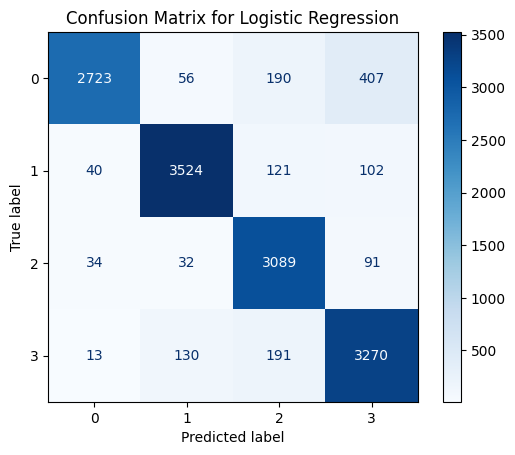

Model: Random Forest
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3376
           1       0.99      0.99      0.99      3787
           2       0.96      0.99      0.97      3246
           3       0.98      0.97      0.97      3604

    accuracy                           0.98     14013
   macro avg       0.98      0.98      0.98     14013
weighted avg       0.98      0.98      0.98     14013



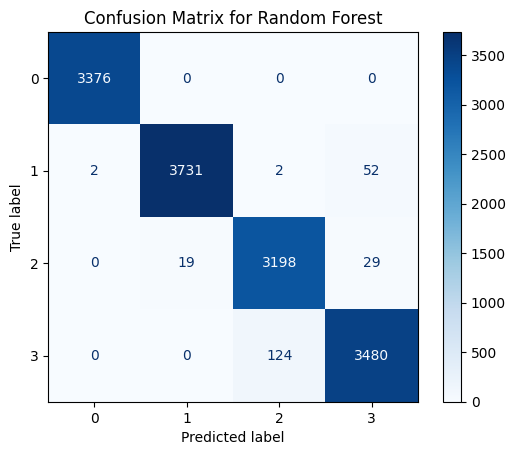

Model: Support Vector Classifier
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      3376
           1       0.90      0.98      0.94      3787
           2       0.92      0.94      0.93      3246
           3       0.87      0.92      0.89      3604

    accuracy                           0.92     14013
   macro avg       0.92      0.91      0.92     14013
weighted avg       0.92      0.92      0.92     14013



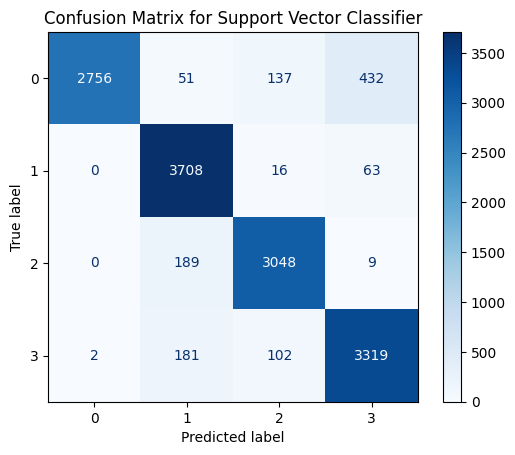

Model: Decision Tree
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.52      0.67      3376
           1       0.89      0.96      0.92      3787
           2       0.78      0.94      0.85      3246
           3       0.72      0.82      0.77      3604

    accuracy                           0.81     14013
   macro avg       0.83      0.81      0.80     14013
weighted avg       0.83      0.81      0.80     14013



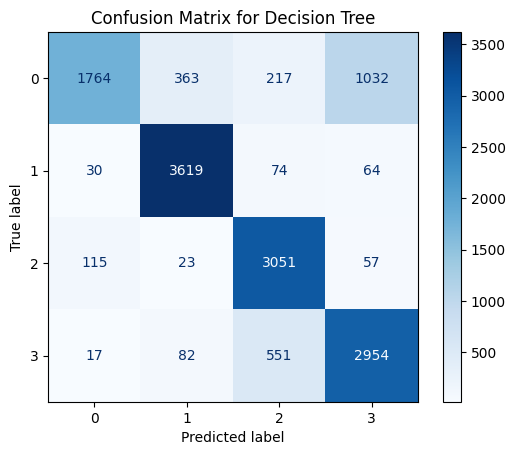

Model: K-Nearest Neighbors
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      3376
           1       0.90      0.94      0.92      3787
           2       0.84      0.91      0.87      3246
           3       0.84      0.85      0.84      3604

    accuracy                           0.88     14013
   macro avg       0.88      0.88      0.88     14013
weighted avg       0.88      0.88      0.88     14013



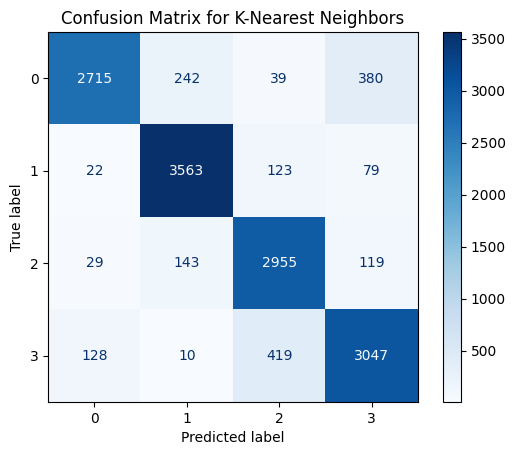

Model: Naive Bayes
Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77      3376
           1       0.98      0.59      0.73      3787
           2       0.57      0.96      0.71      3246
           3       0.81      0.22      0.34      3604

    accuracy                           0.68     14013
   macro avg       0.75      0.69      0.64     14013
weighted avg       0.76      0.68      0.64     14013



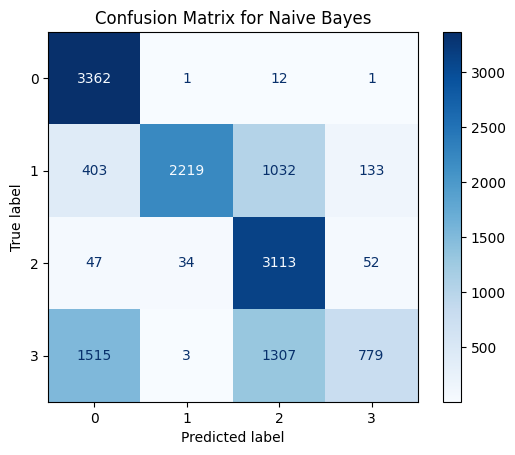

Model: Gradient Boosting
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3376
           1       0.99      0.99      0.99      3787
           2       0.94      0.99      0.96      3246
           3       0.88      0.96      0.92      3604

    accuracy                           0.95     14013
   macro avg       0.95      0.95      0.95     14013
weighted avg       0.95      0.95      0.95     14013



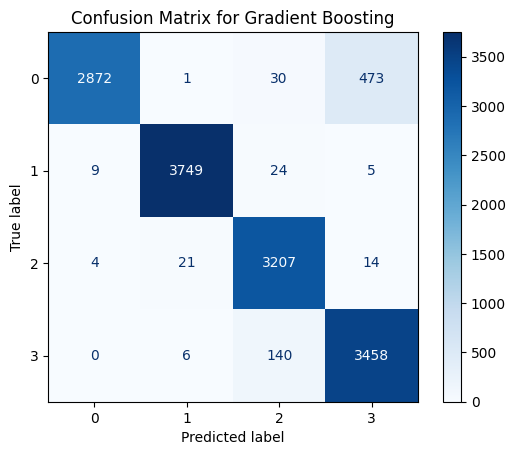

Model: AdaBoost
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      3376
           1       0.83      0.91      0.87      3787
           2       0.79      0.86      0.82      3246
           3       0.79      0.49      0.60      3604

    accuracy                           0.76     14013
   macro avg       0.76      0.76      0.75     14013
weighted avg       0.76      0.76      0.75     14013



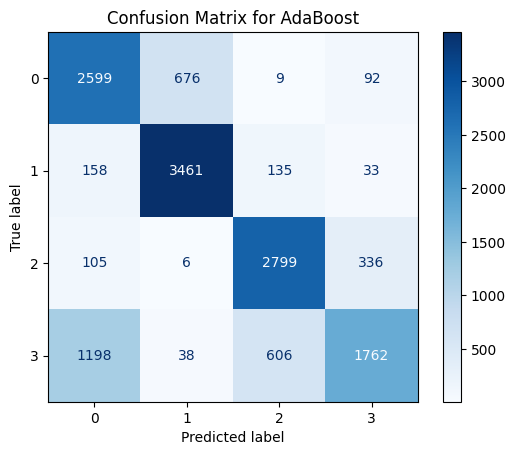

Model: Ridge Classifier
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65      3376
           1       0.93      0.91      0.92      3787
           2       0.80      0.93      0.86      3246
           3       0.67      0.74      0.71      3604

    accuracy                           0.79     14013
   macro avg       0.79      0.79      0.78     14013
weighted avg       0.79      0.79      0.78     14013



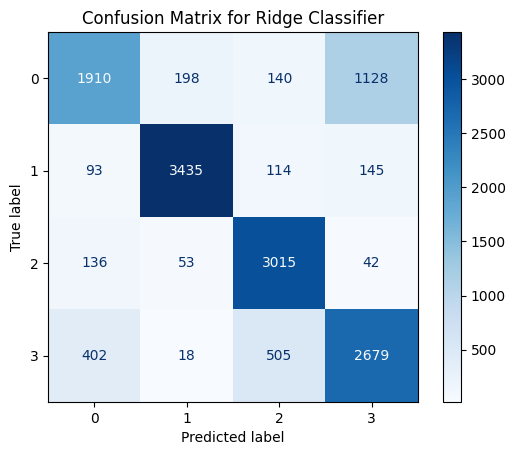

Model: XGBoost
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      3376
           1       0.97      0.99      0.98      3787
           2       0.97      0.98      0.98      3246
           3       0.84      0.99      0.91      3604

    accuracy                           0.94     14013
   macro avg       0.94      0.93      0.93     14013
weighted avg       0.94      0.94      0.94     14013



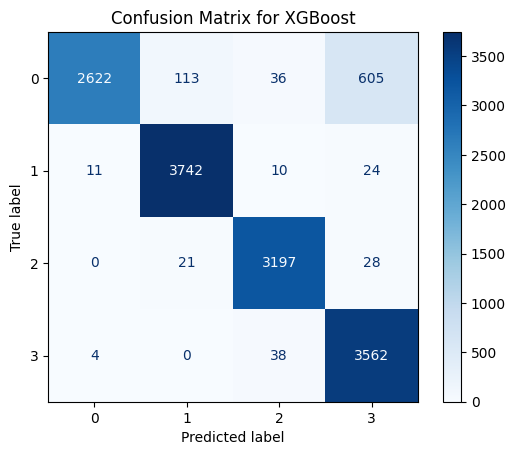


Best Model: Random Forest with Accuracy: 0.98


In [49]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}
def train_and_evaluate_models(x_train, y_train, x_test, y_test):
    best_model = None
    best_model_name = ""
    highest_accuracy = 0
    
    for model_name, model in classifiers.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        # Display results
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy:.2f}")
        report = classification_report(y_test, y_pred)
        print("Classification Report:")
        print(report)
        
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()
        
        # Check for the best model
        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            best_model = model
            best_model_name = model_name
    
    print(f"\nBest Model: {best_model_name} with Accuracy: {highest_accuracy:.2f}")
    return best_model
# Run the function to train and evaluate all models
best_model = train_and_evaluate_models(x_train_scaled, y_train, x_test_scaled, y_test)

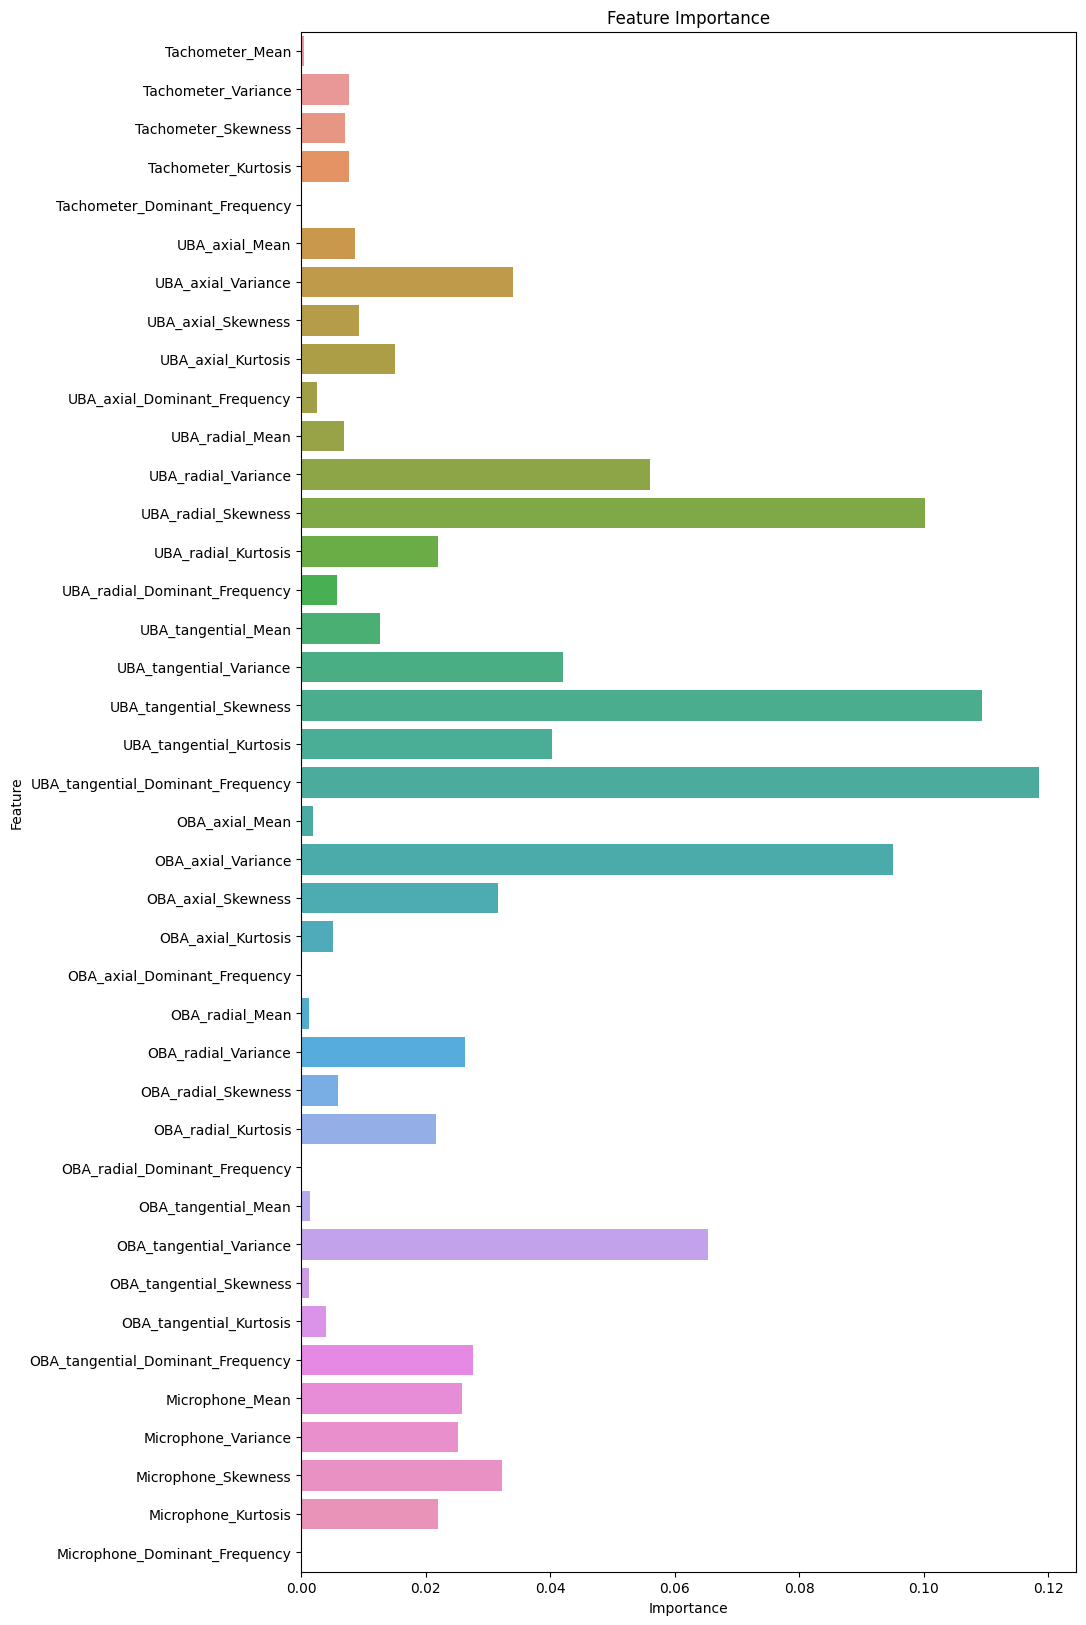

In [56]:
# Feature Importances
importances = best_model.feature_importances_
feature_names = x_train.columns
plt.figure(figsize=(10, len(feature_names)*0.5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


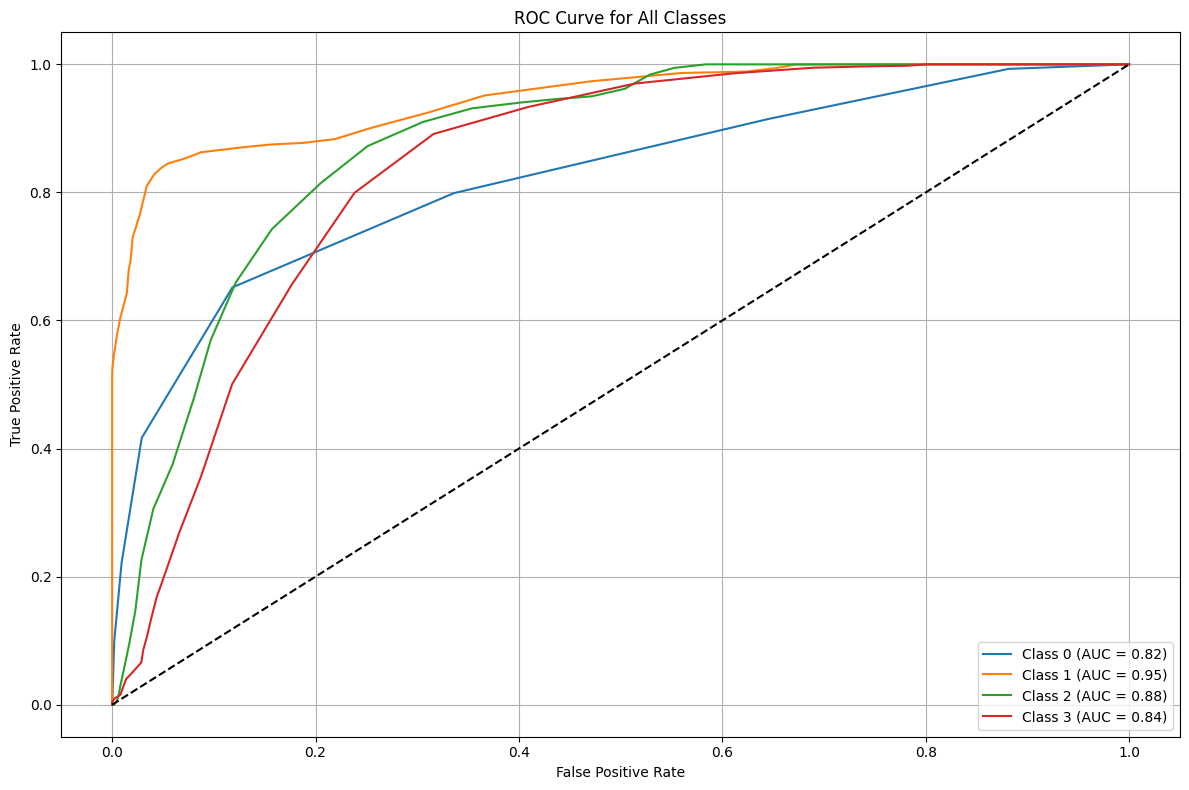

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

y_prob = best_model.predict_proba(x_test)
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

roc_auc_scores = {}
plt.figure(figsize=(12, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    roc_auc_scores[class_label] = auc
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve for All Classes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()